In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Step 2: Load the dataset
# Assuming you have a CSV file named 'student_health_data.csv'
file_path = 'Impact_of_Mobile_Phone_on_Students_Health.csv'
df = pd.read_csv('/content/Impact_of_Mobile_Phone_on_Students_Health.csv')

In [3]:
df.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent


In [4]:
# Data Understanding
print("Initial Dataset Overview:")
print(df.head())

Initial Dataset Overview:
      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distrac

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (100, 20)


In [6]:
print("Data Types:\n", df.dtypes)

Data Types:
 Names                             object
Age                               object
Gender                            object
Mobile Phone                      object
Mobile Operating System           object
Mobile phone use for education    object
Mobile phone activities           object
Helpful for studying              object
Educational Apps                  object
Daily usages                      object
Performance impact                object
Usage distraction                 object
Attention span                    object
Useful features                   object
Health Risks                      object
Beneficial subject                object
Usage symptoms                    object
Symptom frequency                 object
Health precautions                object
Health rating                     object
dtype: object


In [7]:
print(df.to_string())

        Names    Age Gender  Mobile Phone  Mobile Operating System  Mobile phone use for education                           Mobile phone activities Helpful for studying    Educational Apps Daily usages Performance impact      Usage distraction Attention span   Useful features    Health Risks Beneficial subject                                             Usage symptoms Symptom frequency                 Health precautions             Health rating
0         Ali  21-25    Male           Yes                  Android                      Sometimes                                      Social Media                  Yes  Educational Videos    4-6 hours              Agree           During Exams            Yes            Camera             Yes         Accounting                                                   Headache             Never            Using Blue light filter                 Excellent
1       Bilal  21-25    Male           Yes                  Android                      Sometimes

In [8]:
# Data Exploration
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  98 non-null     object
 6   Mobile phone activities         99 non-null     object
 7   Helpful for studying            98 non-null     object
 8   Educational Apps                98 non-null     object
 9   Daily usages                    99 non-null     object
 10  Performance impact              98 non-null     object
 11  Usage distraction               98 non-null     object
 12  Attention span               

In [9]:
print("\nBasic Statistics Summary:")
print(df.describe(include='all'))


Basic Statistics Summary:
       Names    Age Gender  Mobile Phone  Mobile Operating System   \
count    100    100     100           100                      100   
unique   100      4       2             1                        2   
top      Ali  21-25    Male           Yes                  Android   
freq       1     72      81           100                       81   

       Mobile phone use for education Mobile phone activities  \
count                              98                      99   
unique                              4                       7   
top                         Sometimes            All of these   
freq                               53                      59   

       Helpful for studying    Educational Apps Daily usages  \
count                    98                  98           99   
unique                    2                   4            4   
top                     Yes  Educational Videos    4-6 hours   
freq                     94             

In [10]:
# Step 4: Handle Missing Values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [11]:
# Identify Data Problems
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
print("\nMissing Values in Each Column:")

Missing Values:
 Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    2
Mobile phone activities           1
Helpful for studying              2
Educational Apps                  2
Daily usages                      1
Performance impact                2
Usage distraction                 2
Attention span                    1
Useful features                   2
Health Risks                      2
Beneficial subject                1
Usage symptoms                    2
Symptom frequency                 1
Health precautions                1
Health rating                     1
dtype: int64

Missing Values in Each Column:


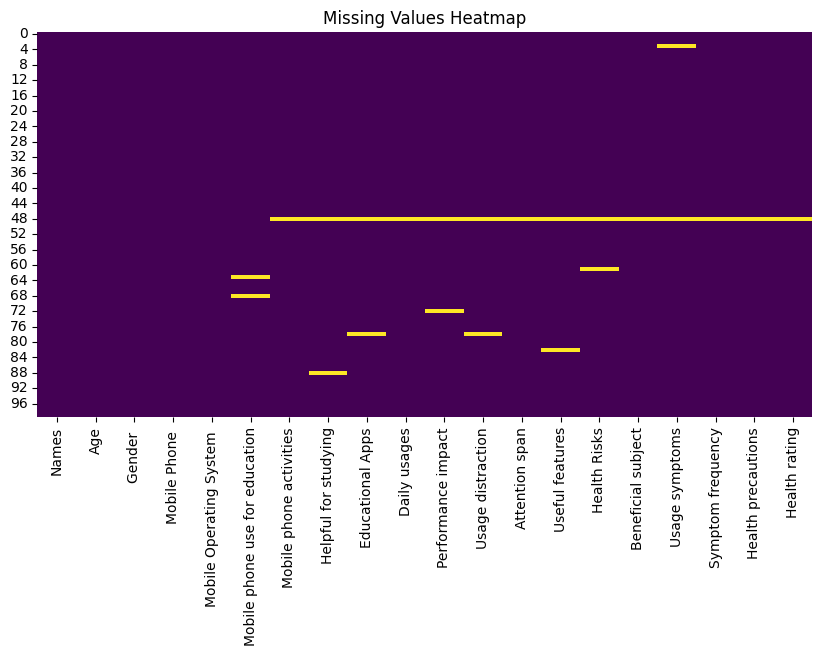

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
# Check for duplicate records
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")


Number of duplicate records: 0


In [14]:

# Handle missing values (e.g., filling with median, mean, or mode)
df = df.fillna(df.median(numeric_only=True))

In [15]:
# Drop duplicate records
df = df.drop_duplicates()

In [16]:
# Assuming that 'df' is the DataFrame you intended to copy
Original_data = df.copy()

In [17]:
# Check the column names of the DataFrame
print(df.columns)

Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')


In [18]:
# Convert string columns to numerical representations
# First you need to identify columns with string values
for col in df_imputed.columns:
  if df_imputed[col].dtype == 'object':
    print(f"Column {col} contains string values.")

Column Names contains string values.
Column Age contains string values.
Column Gender  contains string values.
Column Mobile Phone  contains string values.
Column Mobile Operating System  contains string values.
Column Mobile phone use for education contains string values.
Column Mobile phone activities contains string values.
Column Helpful for studying contains string values.
Column Educational Apps contains string values.
Column Daily usages contains string values.
Column Performance impact contains string values.
Column Usage distraction contains string values.
Column Attention span contains string values.
Column Useful features contains string values.
Column Health Risks contains string values.
Column Beneficial subject contains string values.
Column Usage symptoms contains string values.
Column Symptom frequency contains string values.
Column Health precautions contains string values.
Column Health rating contains string values.


In [19]:
# Step 5: Convert Categorical to Numerical
label_encoders = {}
for column in df_imputed.select_dtypes(include=['object']).columns:
    if df_imputed[column].nunique() < 10:  # only encode categorical columns
        le = LabelEncoder()
        df_imputed[column] = le.fit_transform(df_imputed[column])
        label_encoders[column] = le

In [20]:
# Step 6: Normalize Numerical Columns
scaler = StandardScaler()
numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns
df_imputed[numerical_columns] = scaler.fit_transform(df_imputed[numerical_columns])

In [21]:
# Step 6: Normalize Numerical Columns
from sklearn.preprocessing import StandardScaler

In [22]:
# Identify numerical columns in the dataset
numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns

In [23]:
# Initialize StandardScaler
scaler = StandardScaler()

In [24]:
# Identify numerical columns in the dataset
numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on numerical columns and transform
df_imputed[numerical_columns] = scaler.fit_transform(df_imputed[numerical_columns])

In [25]:
# Display the normalized dataset
print("\nNormalized Data (first few rows):")
print(df_imputed.head())


Normalized Data (first few rows):
      Names       Age   Gender   Mobile Phone   Mobile Operating System   \
0       Ali -0.045798  0.484322            0.0                 -0.484322   
1     Bilal -0.045798  0.484322            0.0                 -0.484322   
2    Hammad -0.045798  0.484322            0.0                  2.064742   
3  Abdullah -0.045798  0.484322            0.0                 -0.484322   
4     Waqar -0.045798  0.484322            0.0                  2.064742   

   Mobile phone use for education  Mobile phone activities  \
0                        0.818044                 0.428623   
1                        0.818044                 0.428623   
2                        0.818044                -0.670411   
3                       -1.519224                -0.670411   
4                       -1.519224                -0.670411   

   Helpful for studying  Educational Apps  Daily usages  Performance impact  \
0              0.204124         -0.770154     -0.268328 

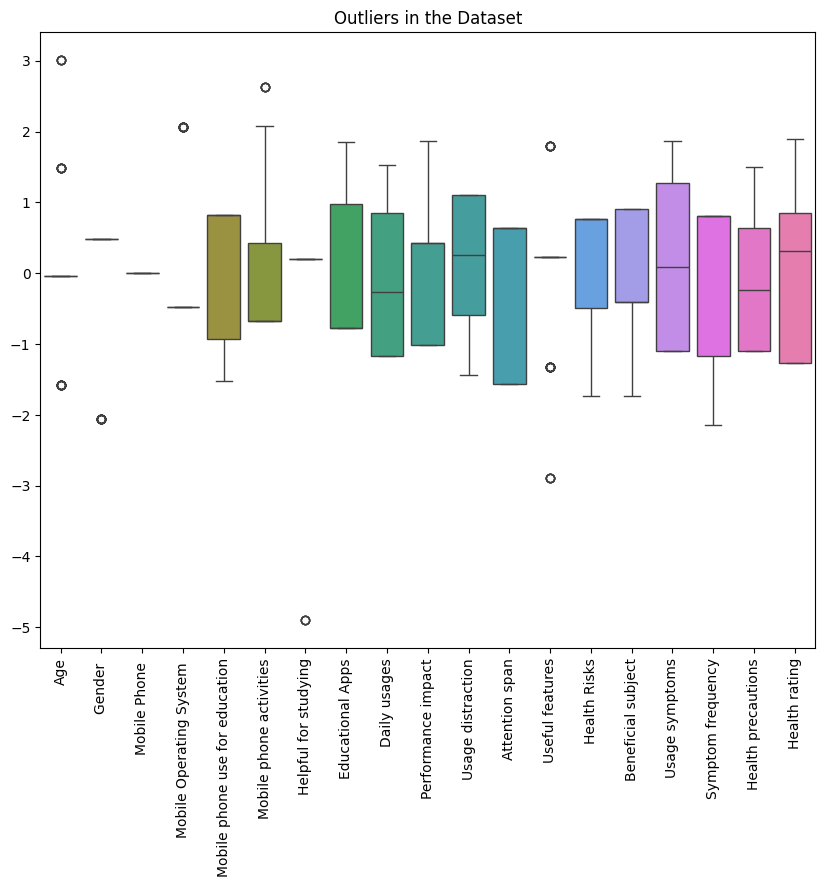

In [26]:
# Step 7: Visualize Data to Identify Outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_imputed)
plt.xticks(rotation=90)
plt.title("Outliers in the Dataset")
plt.show()

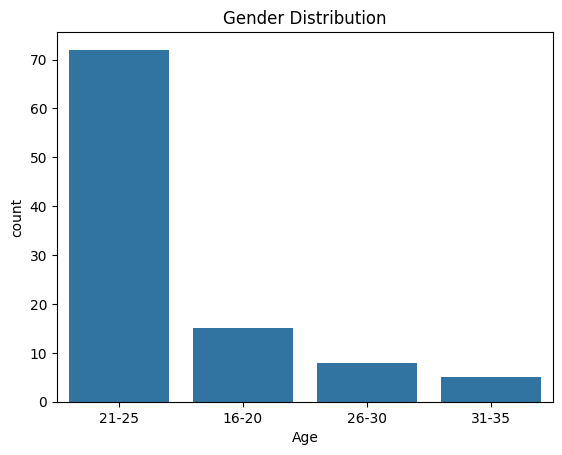

In [27]:
# Visualize the distribution of key variables
sns.countplot(x='Age', data=df) # Changed 'Age' to 'Gender' to match the title of the plot
plt.title('Gender Distribution')
plt.show()

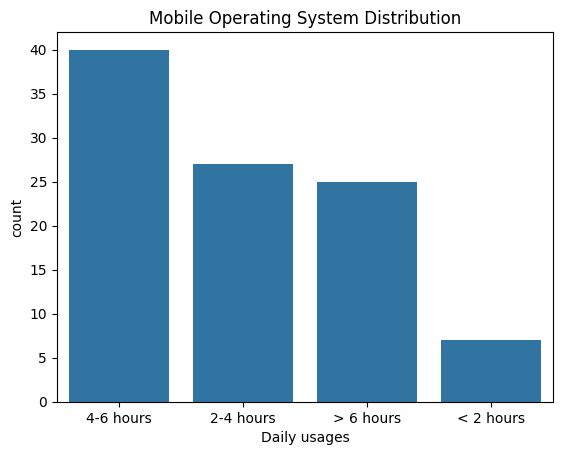

In [28]:
sns.countplot(x='Daily usages', data=df)
plt.title('Mobile Operating System Distribution')
plt.show()

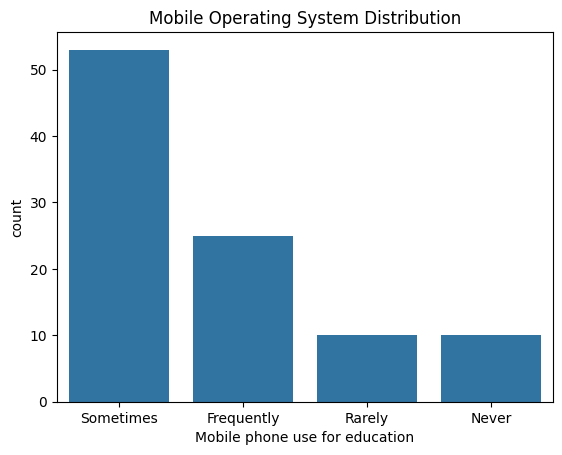

In [29]:
sns.countplot(x='Mobile phone use for education', data=df)
plt.title('Mobile Operating System Distribution')
plt.show()

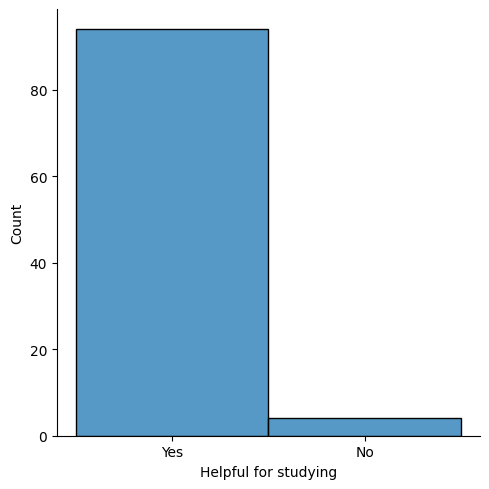

In [30]:
imputedData = df  # Rename df to imputedData
sns.displot(imputedData["Helpful for studying"])

Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')


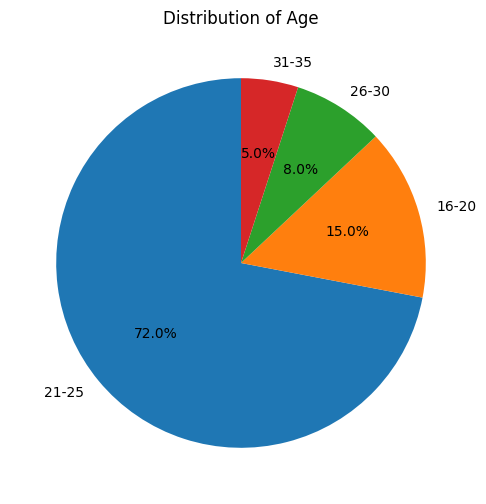

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into the imputedData variable
imputedData = pd.read_csv('/content/Impact_of_Mobile_Phone_on_Students_Health.csv')

# Print the actual column names to inspect them
print(imputedData.columns)

# Access columns using their actual names (replace with actual names from the output above)
plt.figure(figsize=(6, 6))
plt.pie(imputedData['Age'].value_counts(),  # Replace 'Age' with the actual column name
        labels=imputedData['Age'].value_counts().index,  # Replace 'Age' with the actual column name
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Age')  # Update the title accordingly
plt.show()


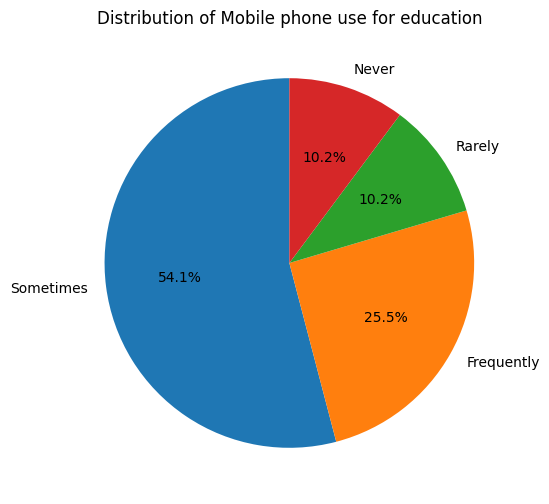

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Repeat for other categorical columns as needed
# For example:
plt.figure(figsize=(6, 6))

# Access the column using its actual name from the DataFrame
plt.pie(imputedData['Mobile phone use for education'].value_counts(),
        labels=imputedData['Mobile phone use for education'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)

# Update the title to reflect the actual column name
plt.title('Distribution of Mobile phone use for education')
plt.show()

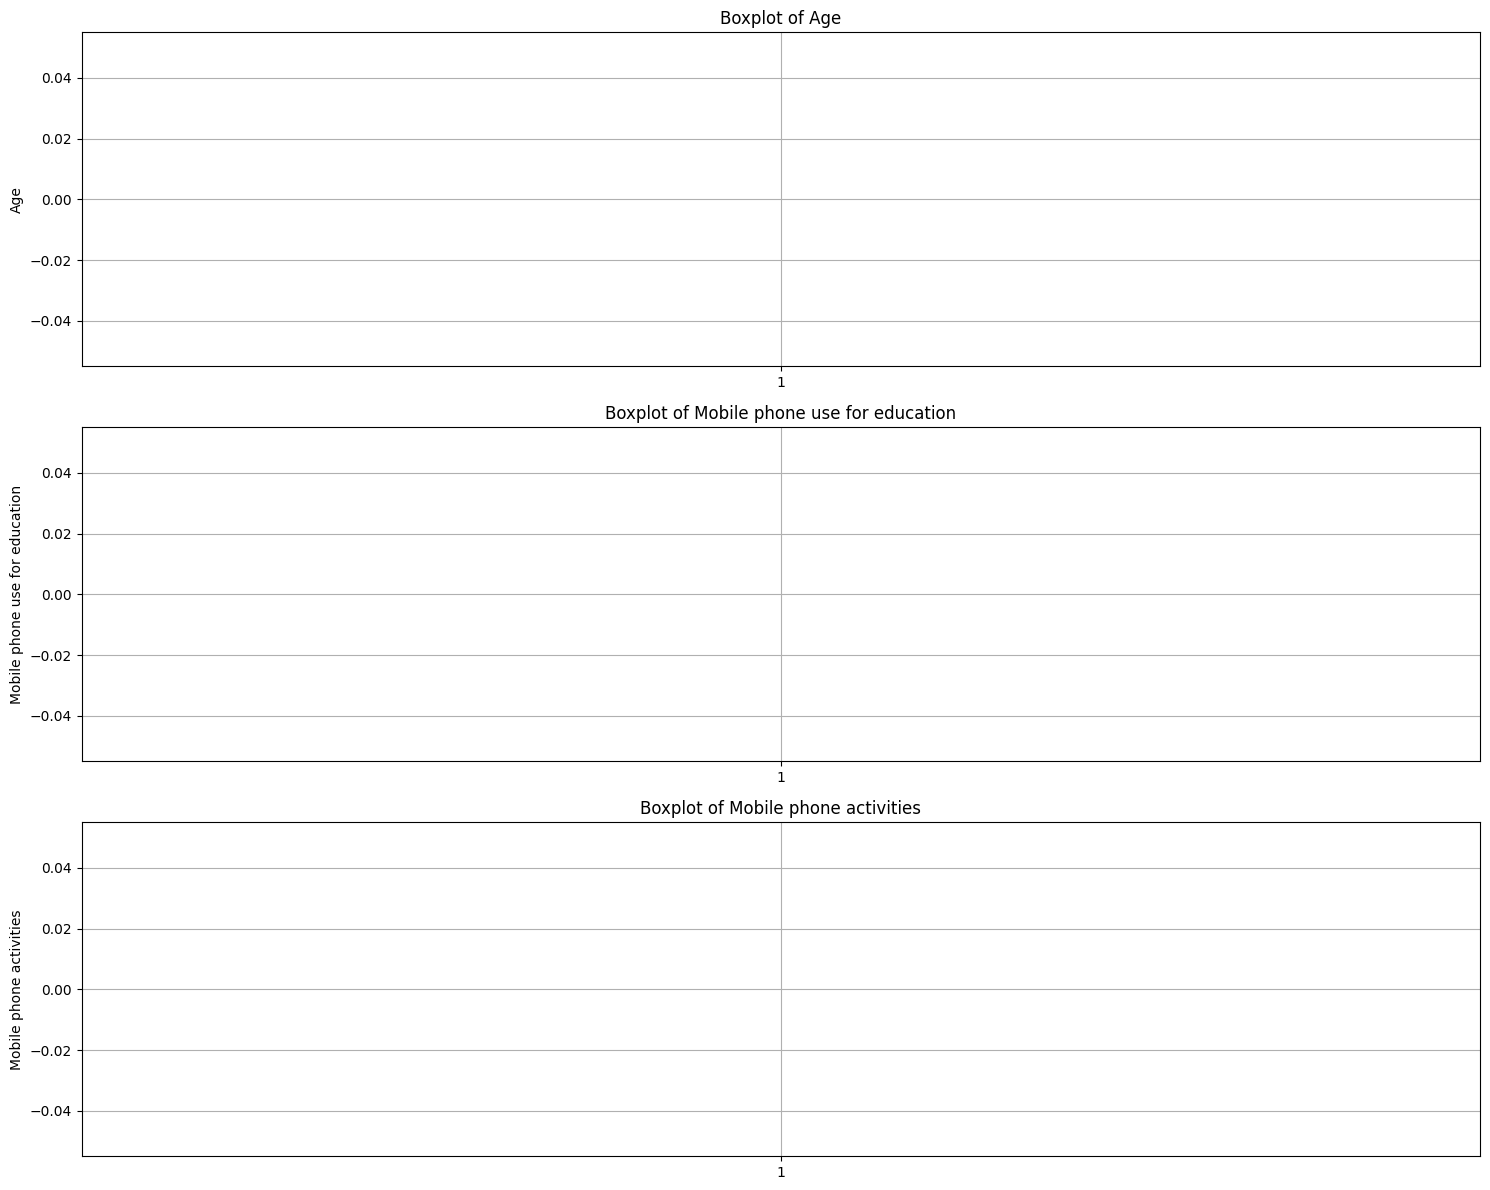

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
imputedData = pd.read_csv('/content/Impact_of_Mobile_Phone_on_Students_Health.csv')

# Columns to be converted to numeric
columns_to_convert = ['Age', 'Mobile phone use for education', 'Mobile phone activities']

# Convert columns to numeric, coercing errors to NaN
for col in columns_to_convert:
    imputedData[col] = pd.to_numeric(imputedData[col], errors='coerce')

# Plot boxplots for each column
plt.figure(figsize=(15, 12))  # Larger figure to accommodate multiple subplots

for i, col in enumerate(columns_to_convert, 1):
    plt.subplot(3, 1, i)  # Create subplots for each variable
    plt.boxplot(imputedData[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [34]:
# Step 8: Apply Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_imputed['Cluster'] = kmeans.fit_predict(df_imputed[numerical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
# Step 9: Evaluate Clustering Performance
print("\nCluster Centers:")
print(kmeans.cluster_centers_)
score = silhouette_score(df_imputed[numerical_columns], df_imputed['Cluster'])
print(f"\nSilhouette Score: {score}")



Cluster Centers:
[[ 0.33584851 -0.15294382  0.         -0.4843221  -0.35059022 -0.25827295
  -4.89897949  0.98019606  1.29691943  1.14691632 -0.16963779  0.08815193
  -1.33154276 -0.80131574 -0.4092075  -0.05905386 -0.42418608 -0.01729609
  -0.21081851]
 [-0.12026504 -0.07522847  0.          0.19957304  0.17196973 -0.10749087
   0.20412415  0.12636674 -0.09380578  0.63670657  0.48201956 -0.32841969
   0.043939   -0.39668794  0.07372818 -0.40113414 -0.61065471  0.0196163
  -0.03085149]
 [ 0.06522678  0.06720259  0.         -0.1135492  -0.10269815  0.09891304
   0.20412415 -0.16548765 -0.02439347 -0.5580479  -0.34698638  0.2384109
   0.06408495  0.35399033 -0.02520046  0.3033221   0.48606523 -0.01336516
   0.03833064]]

Silhouette Score: 0.07762262711252953


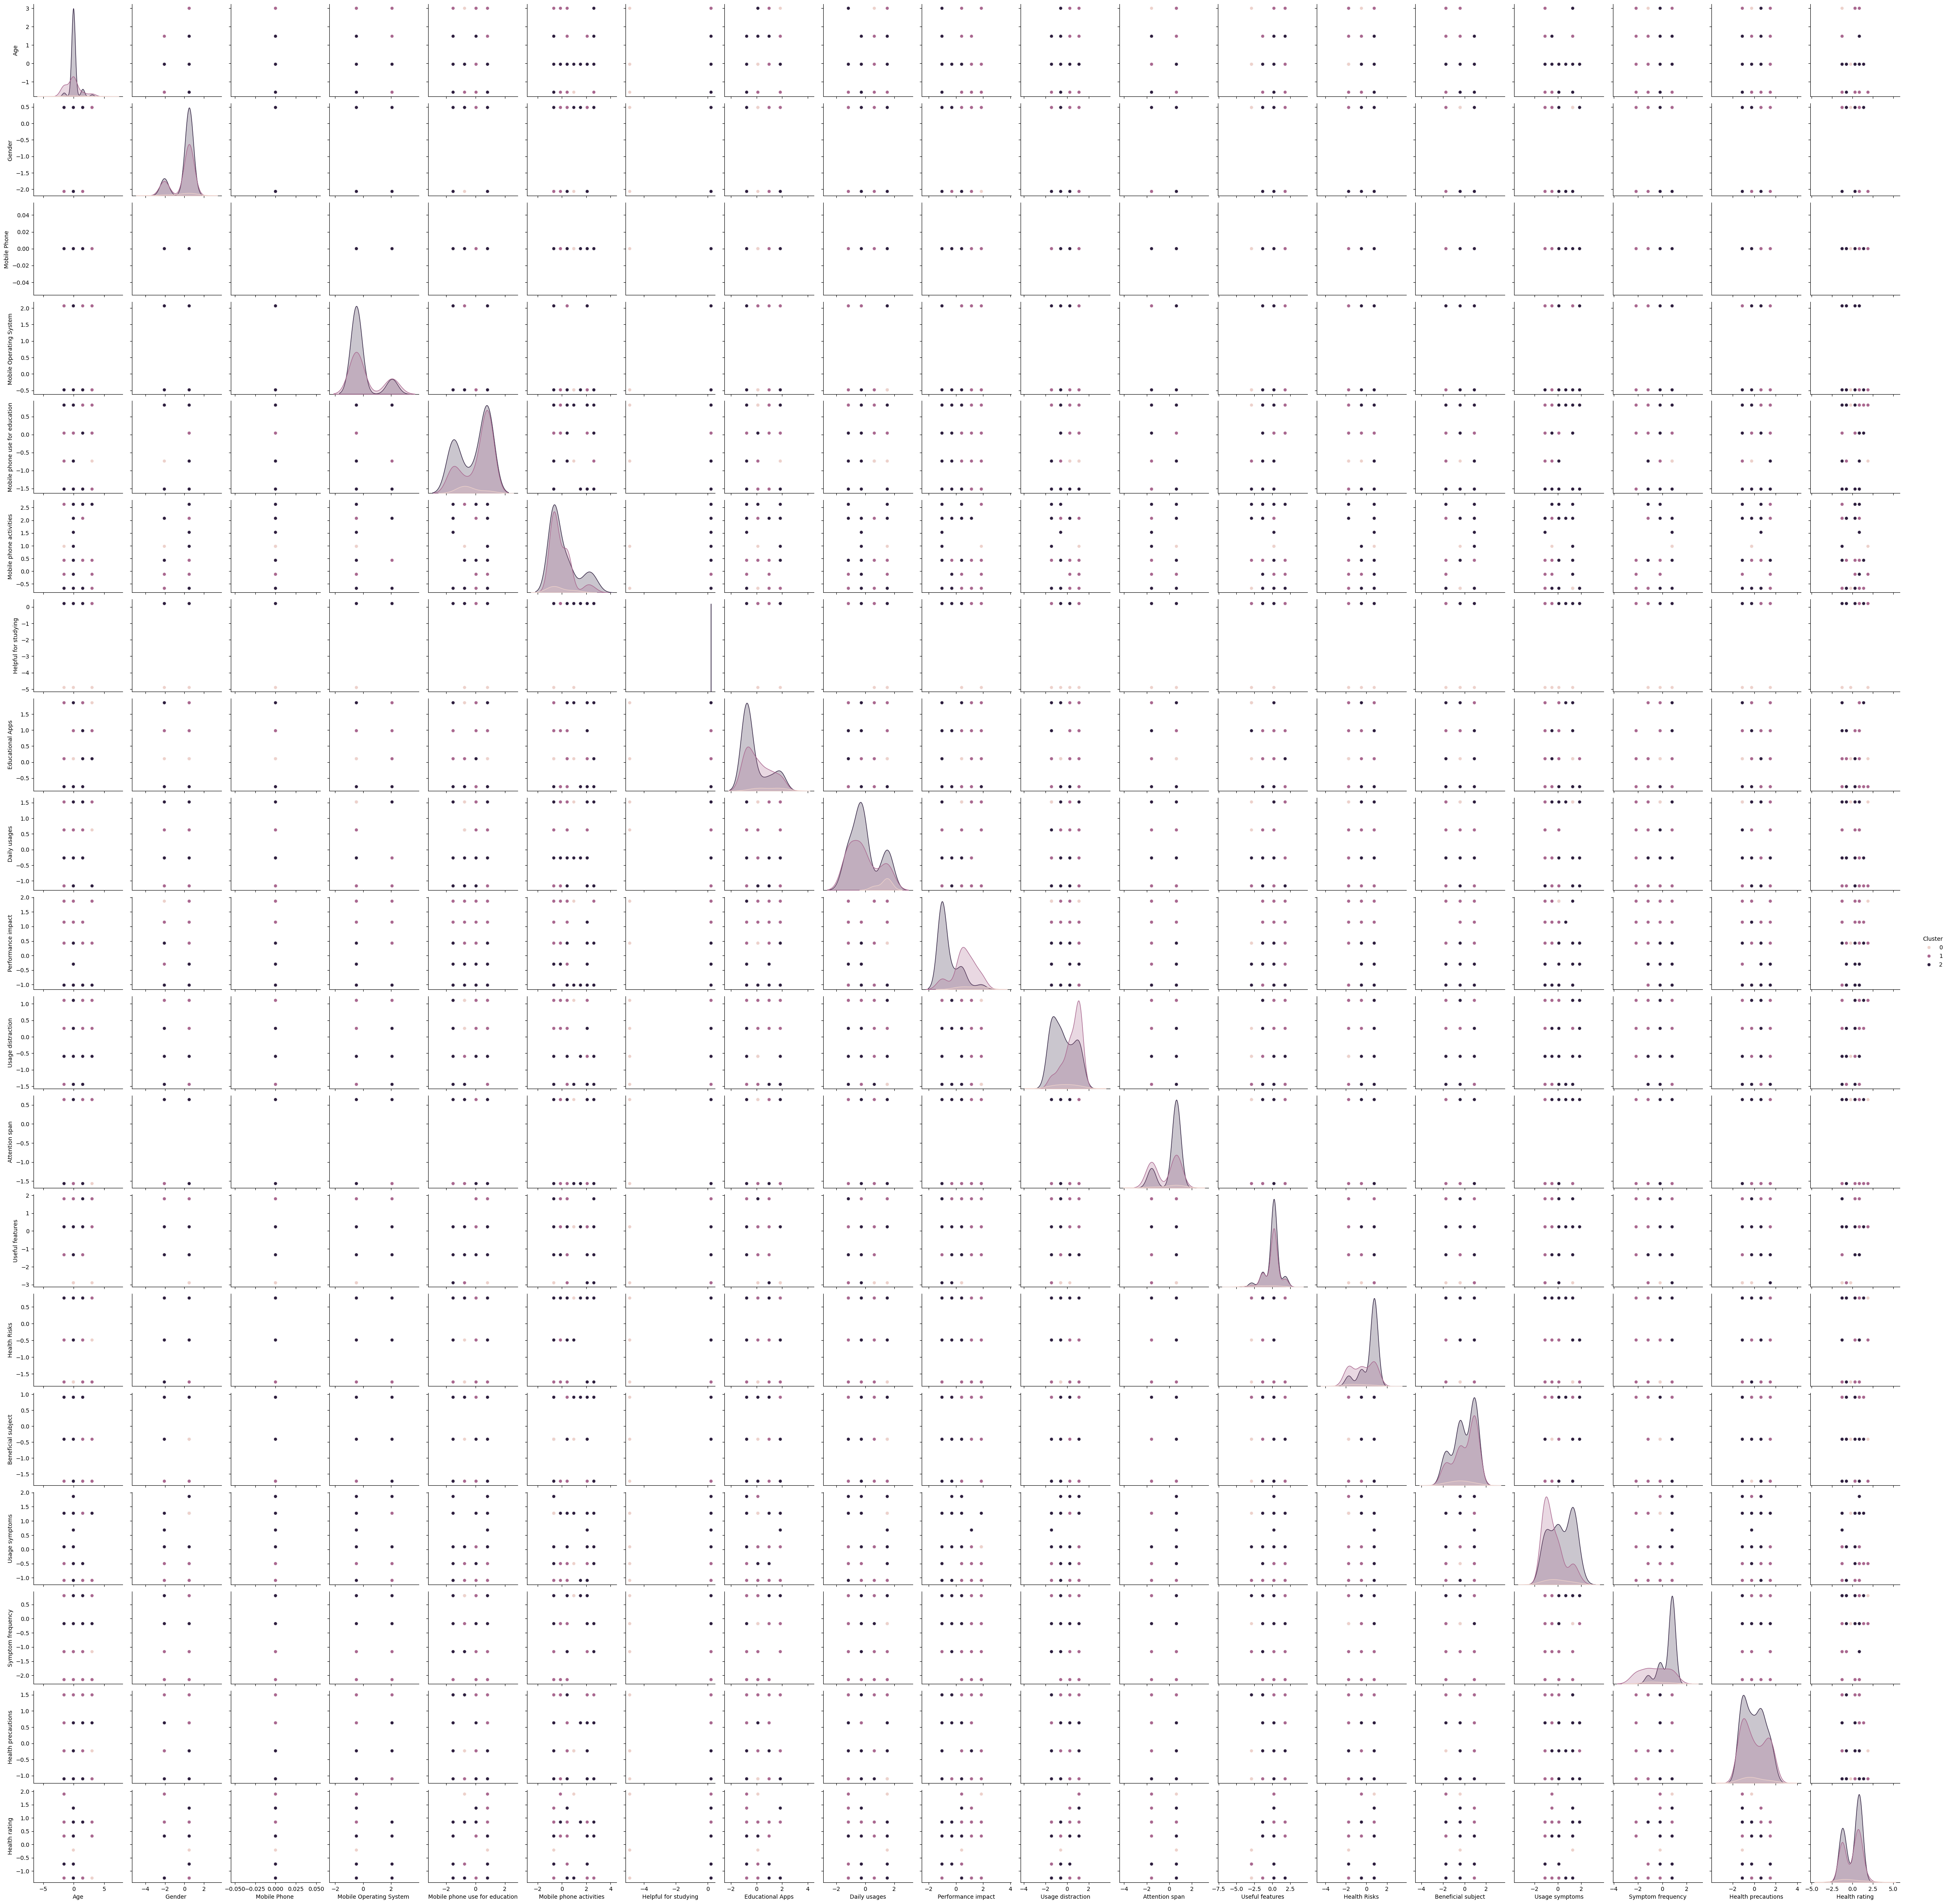

In [36]:
# Step 10: Visualize Clustering Results
sns.pairplot(df_imputed, hue='Cluster')
plt.show()


In [37]:
# Feature Scaling
scaler = StandardScaler()
numeric_cols = ['Daily usages']

# Convert 'Daily usages' to numeric values - assuming hours
# Use a regular expression to remove non-numeric characters from the beginning of the string
df['Daily usages'] = df['Daily usages'].str.split('-').str[0].str.replace(r'[^0-9.]', '', regex=True).str.strip().astype(float)

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [38]:
# Splitting the data into Training and Testing sets
X = df.drop(columns=['Names'])

# Check the available columns after one-hot encoding
print(df.columns)

Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')


In [39]:
# Check if 'Performance impact_Agree' exists
if 'Performance impact_Agree' in df.columns:
    y = df['Performance impact_Agree']  # Target variable
else:
    # Handle the case where the column doesn't exist
    # For example, print an error message and identify potential target variables
    print(f"Column 'Performance impact_Agree' not found! Available columns are: {df.columns}")
    # Choose a different target variable based on available columns
    y = df['Helpful for studying'] # Example: Replace with an actual target variable from df.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Column 'Performance impact_Agree' not found! Available columns are: Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')


In [40]:
# Import the necessary module
from sklearn.ensemble import RandomForestClassifier

Columns in the dataset: Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dtype='object')
Column 'Performance impact_Agree' not found! Available columns are: Index(['Names', 'Age', 'Gender ', 'Mobile Phone ', 'Mobile Operating System ',
       'Mobile phone use for education', 'Mobile phone activities',
       'Helpful for studying', 'Educational Apps', 'Daily usages',
       'Performance impact', 'Usage distraction', 'Attention span',
       'Useful features', 'Health Risks', 'Beneficial subject',
       'Usage symptoms', 'Symptom frequency', 'Health precautions',
       'Health rating'],
      dt

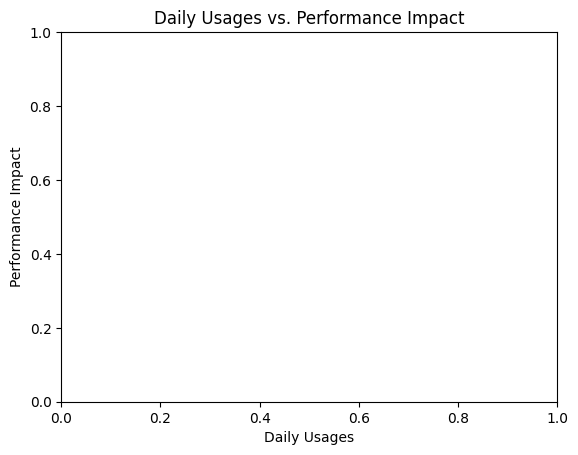

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Impact_of_Mobile_Phone_on_Students_Health.csv')

# Display column names
print("Columns in the dataset:", df.columns)

# Identify target variable
if 'Performance impact_Agree' not in df.columns:
    print(f"Column 'Performance impact_Agree' not found! Available columns are: {df.columns}")
    y_col = 'Helpful for studying'  # Replace with an actual target variable from df.columns
else:
    y_col = 'Performance impact_Agree'

# Check for missing values in 'Daily usages' and y_col
print("Missing values in 'Daily usages':", df['Daily usages'].isnull().sum())
print("Missing values in target variable '{}':".format(y_col), df[y_col].isnull().sum())

# Convert target variable to numeric if it's categorical
if df[y_col].dtype == 'object':
    df[y_col] = df[y_col].map({'Agree': 1, 'Disagree': 0})

# Drop rows with missing values in either column
df = df.dropna(subset=['Daily usages', y_col])

# Plot boxplot
sns.boxplot(x='Daily usages', y=y_col, data=df)
plt.title('Daily Usages vs. Performance Impact')
plt.xlabel('Daily Usages')
plt.ylabel('Performance Impact')
plt.show()


In [42]:
# Step 8: Save the cleaned dataset
df_imputed.to_csv('Cleaned_Impact_of_Mobile_Phone_on_Students_Health.csv', index=False)